# Predicción de la Incidencia del dengue en Regiones del Perú usando Machine Learning


In [ ]:
import pandas as pd

df_dengue = pd.read_csv('https://raw.githubusercontent.com/galuf/dengueML/refs/heads/main/datos_abiertos_vigilancia_dengue_2000_2023.csv')

In [ ]:
df_dengue.columns

Index(['departamento', 'provincia', 'distrito', 'enfermedad', 'ano', 'semana',
       'diagnostic', 'tipo_dx', 'diresa', 'ubigeo', 'edad', 'tipo_edad',
       'sexo'],
      dtype='object')

In [ ]:
df_dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757890 entries, 0 to 757889
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   departamento  757890 non-null  object 
 1   provincia     757890 non-null  object 
 2   distrito      757890 non-null  object 
 3   enfermedad    757890 non-null  object 
 4   ano           757890 non-null  int64  
 5   semana        757890 non-null  int64  
 6   diagnostic    757890 non-null  object 
 7   tipo_dx       757890 non-null  object 
 8   diresa        757867 non-null  float64
 9   ubigeo        757890 non-null  int64  
 10  edad          757890 non-null  int64  
 11  tipo_edad     757890 non-null  object 
 12  sexo          757890 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 75.2+ MB


In [ ]:
df_dengue.shape

(757890, 13)

In [ ]:
df_dengue_raw= df_dengue.copy()

In [ ]:
df_dengue_raw  = df_dengue_raw.drop(columns=['enfermedad', 'diagnostic', 'tipo_dx', 'tipo_edad', 'sexo', 'edad','diresa','ubigeo'], axis=1)

## Generación de macro regiones

In [ ]:
# ============================================================
# 3. MACRO-REGIONES / SUB-REGIONES
# === CAMBIO === Crear variable epidemiológica útil
# ============================================================
def map_macro_region(dep):
    dep = dep.upper()
    costa_norte = {'TUMBES', 'PIURA', 'LAMBAYEQUE', 'LA LIBERTAD'}
    costa_norte_chico = {'ANCASH', 'LIMA', 'CALLAO'}
    selva = {'LORETO', 'UCAYALI', 'SAN MARTIN', 'MADRE DE DIOS', 'AMAZONAS'}
    if dep in costa_norte: return 'costa_norte'
    if dep in costa_norte_chico: return 'costa_norte_chico'
    if dep in selva: return 'selva'
    return 'otras'

df_dengue_raw['macro_region'] = df_dengue_raw['departamento'].map(map_macro_region)

In [ ]:
df_dengue_raw =  df_dengue_raw[df_dengue_raw['macro_region'] != 'otras']

In [ ]:
df_dengue_raw

,departamento,provincia,distrito,ano,semana,macro_region
18,UCAYALI,CORONEL PORTILLO,YARINACOCHA,2000,51,selva
37,LA LIBERTAD,TRUJILLO,EL PORVENIR,2000,22,costa_norte
38,LA LIBERTAD,TRUJILLO,EL PORVENIR,2000,26,costa_norte
39,LA LIBERTAD,TRUJILLO,EL PORVENIR,2000,30,costa_norte
40,LA LIBERTAD,TRUJILLO,TRUJILLO,2000,24,costa_norte
...,...,...,...,...,...,...
757885,TUMBES,TUMBES,TUMBES,2023,52,costa_norte
757886,TUMBES,TUMBES,TUMBES,2023,52,costa_norte
757887,TUMBES,TUMBES,TUMBES,2023,52,costa_norte
757888,TUMBES,TUMBES,TUMBES,2023,52,costa_norte


In [ ]:
anios = ['2019','2020','2021','2022','2023']
df_last = []
for anio in anios:
    url = f'https://raw.githubusercontent.com/galuf/dengueML/refs/heads/main/{anio}/{anio}.csv'
    df_year = pd.read_csv(url)
    df_year = df_year.rename(columns={
        'MAX': 'tem_max',
        'MIN': 'tem_min'
    })
    df_last.append(df_year)

df_last_years = pd.concat(df_last, ignore_index=True)

## Union de datos SENAMHI

In [ ]:
import pandas as pd

# Lista para almacenar cada mes
dfs = []

# Leer archivos de enero (01) a diciembre (12)
for mes in range(1, 13):
    url = f'https://github.com/galuf/dengueML/raw/main/2018/senamhi_data_completo2018{mes:02d}.xlsx'
    df = pd.read_excel(url)
    # Renombrar si existen esas columnas
    df = df.rename(columns={
        'TEMPERATURA (°C)': 'tem_max',
        'TEMPERATURA (°C).1': 'tem_min'
    })

    dfs.append(df)

# Unir todos los DataFrames
df_all = pd.concat(dfs, ignore_index=True)

# Mostrar las primeras filas
display(df_all.head())
del df_all['fecha_consulta']
del df_all['codigo']


,AÑO / MES / DÍA,tem_max,tem_min,HUMEDAD RELATIVA (%),PRECIPITACIÓN (mm/día),estacion,codigo,lat,lon,ico,fecha_consulta,departamento,provincia,distrito
0,2018-01-01,21.8,2,75.9,0.0,BAMBAMARCA,100015,-6.67655,-78.51834,M,201801,Cajamarca,Hualgayoc,Bambamarca
1,2018-01-02,24,.4,68.0,0.0,BAMBAMARCA,100015,-6.67655,-78.51834,M,201801,Cajamarca,Hualgayoc,Bambamarca
2,2018-01-03,23.6,3.8,71.6,0.0,BAMBAMARCA,100015,-6.67655,-78.51834,M,201801,Cajamarca,Hualgayoc,Bambamarca
3,2018-01-04,20.4,5.6,87.5,6.5,BAMBAMARCA,100015,-6.67655,-78.51834,M,201801,Cajamarca,Hualgayoc,Bambamarca
4,2018-01-05,20.6,8.6,83.0,19.2,BAMBAMARCA,100015,-6.67655,-78.51834,M,201801,Cajamarca,Hualgayoc,Bambamarca


In [ ]:
# Unir todos los DataFrames
df_f = pd.concat([df_all, df_last_years], ignore_index=True)

# Mostrar las primeras filas
display(df_f.head())

,AÑO / MES / DÍA,tem_max,tem_min,HUMEDAD RELATIVA (%),PRECIPITACIÓN (mm/día),estacion,lat,lon,ico,departamento,provincia,distrito
0,2018-01-01,21.8,2,75.9,0.0,BAMBAMARCA,-6.67655,-78.51834,M,Cajamarca,Hualgayoc,Bambamarca
1,2018-01-02,24,.4,68.0,0.0,BAMBAMARCA,-6.67655,-78.51834,M,Cajamarca,Hualgayoc,Bambamarca
2,2018-01-03,23.6,3.8,71.6,0.0,BAMBAMARCA,-6.67655,-78.51834,M,Cajamarca,Hualgayoc,Bambamarca
3,2018-01-04,20.4,5.6,87.5,6.5,BAMBAMARCA,-6.67655,-78.51834,M,Cajamarca,Hualgayoc,Bambamarca
4,2018-01-05,20.6,8.6,83.0,19.2,BAMBAMARCA,-6.67655,-78.51834,M,Cajamarca,Hualgayoc,Bambamarca


## Limpieza de datos

In [ ]:
# Asegúrate de que la columna 'fecha' esté bien creada y no tenga nulos
df_f['fecha'] = pd.to_datetime(df_f['AÑO / MES / DÍA'], errors='coerce')
df_f = df_f.dropna(subset=['fecha'])

# Convert columns to numeric, coercing errors
for col in ['tem_max', 'tem_min', 'HUMEDAD RELATIVA (%)', 'PRECIPITACIÓN (mm/día)']:
    df_f[col] = pd.to_numeric(df_f[col], errors='coerce')


# Extraer año y semana ISO
df_f['ano'] = df_f['fecha'].dt.year
df_f['semana'] = df_f['fecha'].dt.isocalendar().week

# Agrupar por año, semana, departamento, provincia, distrito
df_semana = df_f.groupby(
    ['ano', 'semana', 'departamento', 'provincia', 'distrito']
)[['tem_max', 'tem_min', 'HUMEDAD RELATIVA (%)', 'PRECIPITACIÓN (mm/día)']].mean().reset_index()

# Mostrar primeras filas
display(df_semana.head())

,ano,semana,departamento,provincia,distrito,tem_max,tem_min,HUMEDAD RELATIVA (%),PRECIPITACIÓN (mm/día)
0,2018,1,Amazonas,Bagua,Aramango,33.5000,18.9125,79.3000,0.4000
1,2018,1,Amazonas,Chachapoyas,Chachapoyas,19.6750,9.8250,80.5375,3.0750
2,2018,1,Amazonas,Utcubamba,Bagua Grande,33.1500,23.1250,91.6625,0.3625
3,2018,1,Amazonas,Utcubamba,Jamalca,25.9000,17.9500,96.1125,5.4000
4,2018,1,Ancash,Aija,Aija,15.8875,1.6625,80.1750,2.0875


## Union de datos CEPLAN

In [ ]:
df_altitud = pd.read_csv('https://raw.githubusercontent.com/galuf/dengueML/refs/heads/main/altitud_distritos_peru.csv')
df_altitud.head()

,departamento,provincia,distrito,ubigeo_inei,ubigeo_reniec,altitud_msnm,latitud,longitud
0,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,10101.0,10101.0,2338.0,-6.229444,-77.872778
1,AMAZONAS,CHACHAPOYAS,ASUNCION,10102.0,10102.0,2823.0,-6.032500,-77.710833
2,AMAZONAS,CHACHAPOYAS,BALSAS,10103.0,10103.0,859.0,-6.835833,-78.019722
3,AMAZONAS,CHACHAPOYAS,CHETO,10104.0,10104.0,2143.0,-6.255556,-77.700833
4,AMAZONAS,CHACHAPOYAS,CHILIQUIN,10105.0,10105.0,2677.0,-6.078333,-77.737500


In [ ]:
df_altitud.drop(columns=['ubigeo_inei','ubigeo_reniec','latitud','longitud'], inplace=True)

In [ ]:
df_altitud.head()

,departamento,provincia,distrito,altitud_msnm
0,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2338.0
1,AMAZONAS,CHACHAPOYAS,ASUNCION,2823.0
2,AMAZONAS,CHACHAPOYAS,BALSAS,859.0
3,AMAZONAS,CHACHAPOYAS,CHETO,2143.0
4,AMAZONAS,CHACHAPOYAS,CHILIQUIN,2677.0


## Union de datos COVID

In [ ]:
df_covid = pd.read_csv("https://raw.githubusercontent.com/galuf/dengueML/refs/heads/main/Datos_covid.csv",sep=';')


In [ ]:
cols_texto = ['departamento', 'provincia', 'distrito']

for col in cols_texto:
    df_dengue_raw[col] = df_dengue_raw[col].str.upper().str.strip()
    df_semana[col] = df_semana[col].str.upper().str.strip()
    df_altitud[col] = df_altitud[col].str.upper().str.strip()
    df_covid[col] = df_covid[col].str.upper().str.strip()

## Union de datos ONI

In [ ]:
df_oni =pd.read_csv('https://raw.githubusercontent.com/galuf/dengueML/refs/heads/main/ONI.csv')
df_oni

,Anio,Mes,TOTAL,ClimAdjust,ANOM
0,2018,1,25.57,26.55,-0.98
1,2018,2,25.98,26.76,-0.78
2,2018,3,26.50,27.29,-0.80
3,2018,4,27.32,27.83,-0.51
4,2018,5,27.74,27.94,-0.20
...,...,...,...,...,...
79,2024,8,26.74,26.86,-0.12
80,2024,9,26.46,26.72,-0.26
81,2024,10,26.45,26.72,-0.27
82,2024,11,26.46,26.70,-0.25


In [ ]:
# Paso 1: Merge con semana para filtrar
df_dengue_stg = df_dengue_raw.merge(
    df_semana,
    on=['ano', 'semana', 'departamento', 'provincia', 'distrito'],
    how='inner'
).merge(
    df_altitud,
    on=['departamento', 'provincia', 'distrito'],
    how='left'
)

# Create a 'date' column to extract the month
df_dengue_stg['date'] = pd.to_datetime(df_dengue_stg['ano'].astype(str) + '-W' + df_dengue_stg['semana'].astype(str) + '-1', format='%Y-W%W-%w')
df_dengue_stg['Mes'] = df_dengue_stg['date'].dt.month

# Merge with df_oni
df_dengue_stg = df_dengue_stg.merge(
    df_oni,
    left_on=['ano', 'Mes'],
    right_on=['Anio', 'Mes'],
    how='left'
)

df_covid_clean = df_covid.drop_duplicates(subset=['ano', 'semana', 'departamento', 'provincia', 'distrito'])

# Paso 2: Solo añadir flag_covid sin reescribir todo
df_dengue_anl = df_dengue_stg.merge(
    df_covid_clean[['ano', 'semana', 'departamento', 'provincia', 'distrito', 'flag_covid']],
    on=['ano', 'semana', 'departamento', 'provincia', 'distrito'],
    how='left'  # ✅ Mantenemos todas las filas del DataFrame con clima
)
df_dengue_anl['flag_covid'] = df_dengue_anl['flag_covid'].fillna(0)

# Drop the temporary 'date', 'Mes', and 'Anio' columns from df_dengue_anl
df_dengue_anl = df_dengue_anl.drop(columns=['date'])

In [ ]:
df_dengue_anl.isnull().sum()

,0
departamento,0
provincia,0
distrito,0
ano,0
semana,0
macro_region,0
tem_max,11931
tem_min,12527
HUMEDAD RELATIVA (%),16963
PRECIPITACIÓN (mm/día),15067


In [ ]:
df_dengue_anl.isnull().sum()

,0
departamento,0
provincia,0
distrito,0
ano,0
semana,0
macro_region,0
tem_max,11931
tem_min,12527
HUMEDAD RELATIVA (%),16963
PRECIPITACIÓN (mm/día),15067


In [ ]:
df_dengue_anl.isnull().sum()

,0
departamento,0
provincia,0
distrito,0
ano,0
semana,0
macro_region,0
tem_max,11931
tem_min,12527
HUMEDAD RELATIVA (%),16963
PRECIPITACIÓN (mm/día),15067


In [ ]:
df_dengue_anl.shape

(88162, 17)

In [ ]:
df_dengue_anl.isnull().sum()

,0
departamento,0
provincia,0
distrito,0
ano,0
semana,0
macro_region,0
tem_max,11931
tem_min,12527
HUMEDAD RELATIVA (%),16963
PRECIPITACIÓN (mm/día),15067


In [ ]:
df_dengue_anl.drop(columns=['departamento','provincia','distrito'], inplace=True)

## Transformaciones finales del dataset pre entrenamiento

In [ ]:
from scipy.stats import mode

df_macro_sem_dengue = (
    df_dengue_anl
      .groupby(['macro_region','ano','semana'])
      .agg(
          total_casos   = ('macro_region', 'size'),
          precip_mean   = ('PRECIPITACIÓN (mm/día)', 'mean'),
          temp_max_mean = ('tem_max', 'mean'),
          temp_min_mean = ('tem_min', 'mean'),
          hum_mean      = ('HUMEDAD RELATIVA (%)', 'mean'),
          oni_mean      = ('ANOM', 'mean'),
          climadjust_mean = ('ClimAdjust', 'mean'),
          total_mean = ('TOTAL', 'mean'),
          altitud_mean  = ('altitud_msnm', 'mean'), # Include altitud_mean here
         flag_covid_mod = ('flag_covid', lambda x: mode(x, keepdims=True).mode[0])
      )
      .reset_index()
)

In [ ]:
df_macro_sem_dengue

,macro_region,ano,semana,total_casos,precip_mean,temp_max_mean,temp_min_mean,hum_mean,oni_mean,climadjust_mean,total_mean,altitud_mean,flag_covid_mod
0,costa_norte,2018,1,4,0.000000,30.600000,23.400000,83.000000,-0.98,26.55,25.57,9.000000,0.0
1,costa_norte,2018,2,2,0.685714,34.135714,20.264286,70.357143,-0.98,26.55,25.57,105.000000,0.0
2,costa_norte,2018,3,1,0.000000,35.285714,19.871429,63.885714,-0.98,26.55,25.57,35.000000,0.0
3,costa_norte,2018,4,2,0.000000,36.371429,20.685714,72.000000,-0.98,26.55,25.57,135.000000,0.0
4,costa_norte,2018,5,3,0.000000,33.857143,21.657143,70.980952,-0.98,26.55,25.57,53.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,selva,2023,48,149,0.410225,27.888762,19.440800,86.461860,2.02,26.70,28.72,584.906040,0.0
677,selva,2023,49,152,-9.508708,28.569423,20.634044,88.548783,2.02,26.60,28.63,580.388158,0.0
678,selva,2023,50,164,-0.341685,26.612448,20.352851,87.348210,2.02,26.60,28.63,415.207317,0.0
679,selva,2023,51,156,-1.464474,28.267472,20.402966,85.925072,2.02,26.60,28.63,490.923077,0.0


In [ ]:
# Print data types and non-null counts
df_macro_sem_dengue.info()

# Calculate and print missing values
print("\nMissing values per column:")
print(df_macro_sem_dengue.isnull().sum())

# Generate and print summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df_macro_sem_dengue.describe())

# Generate and print summary statistics for object columns
print("\nSummary statistics for object columns:")
print(df_macro_sem_dengue.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   macro_region     681 non-null    object 
 1   ano              681 non-null    int64  
 2   semana           681 non-null    int64  
 3   total_casos      681 non-null    int64  
 4   precip_mean      653 non-null    float64
 5   temp_max_mean    631 non-null    float64
 6   temp_min_mean    629 non-null    float64
 7   hum_mean         603 non-null    float64
 8   oni_mean         681 non-null    float64
 9   climadjust_mean  681 non-null    float64
 10  total_mean       681 non-null    float64
 11  altitud_mean     681 non-null    float64
 12  flag_covid_mod   681 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 69.3+ KB

Missing values per column:
macro_region        0
ano                 0
semana              0
total_casos         0
precip_mean        28
temp

In [ ]:
df = df_macro_sem_dengue.copy()

## Entrenamiento en modelos

In [ ]:
# Classification Project: Sonar rocks or mines

# Load libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.macro_region.value_counts()

,count
macro_region,
selva,313
costa_norte,265
costa_norte_chico,103


In [ ]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# 1) Carga y feature engineering temporal
#df = pd.read_csv('/content/df__dengue_delivery.csv')

# Variables cíclicas de semana
df['sin_sem'] = np.sin(2*np.pi*df['semana']/52)
df['cos_sem'] = np.cos(2*np.pi*df['semana']/52)

# Lags de casos (1–4 semanas)
for lag in range(1,5):
    df[f'lag_{lag}'] = df['total_casos'].shift(lag)

# Rolling mean 4 semanas
df['roll_4'] = df['total_casos'].rolling(4).mean()

# Eliminar filas con NaN de lags/rolling
df = df.dropna().reset_index(drop=True)

# 2) Definir X, y
num_feats = [
    'ano','semana','sin_sem','cos_sem',
    'precip_mean','temp_max_mean','temp_min_mean','hum_mean','altitud_mean',
    'lag_1','lag_2','lag_3','lag_4','roll_4','flag_covid_mod','oni_mean','total_mean','climadjust_mean'
]
cat_feats = ['macro_region']
X = df[num_feats + cat_feats]
y = df['total_casos']

# 3) Split temporal 70/30 SIN shuffle sobre los disponibles hasta sem39 de 2023
avail = df[(df['ano']<2023) | ((df['ano']==2023)&(df['semana']<=39))]
hold = df[(df['ano']==2023)&(df['semana']>=40)]

X_av, y_av   = avail[num_feats+cat_feats], avail['total_casos']
X_hold, y_hold = hold[num_feats+cat_feats], hold['total_casos']

X_train, X_test, y_train, y_test = train_test_split(
    X_av, y_av,
    test_size=0.3,
    shuffle=False  # importante: sin shuffle
)

# 4) Pipeline de preprocesamiento
pre = ColumnTransformer([
    ('num', StandardScaler(), num_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feats)
])

# 5) Validación por TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# 6) RandomizedSearchCV ligero
param_dist = {
    'model__n_estimators': [100,200,300],
    'model__max_depth'   : [5,10,15],
    'model__min_samples_leaf': [1,2,4]
}
pipe = Pipeline([
    ('prep', pre),
    ('model', RandomForestRegressor(random_state=7))
])
search = RandomizedSearchCV(
    pipe, param_dist,
    n_iter=5,
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    random_state=7,
    n_jobs=1
)
search.fit(X_train, y_train)
best = search.best_estimator_

# 7) Métricas
def report(name, X, y):
    p = best.predict(X)
    rmse = np.sqrt(mean_squared_error(y, p))
    r2   = r2_score(y, p)
    print(f"{name}: RMSE={rmse:.2f}, R²={r2:.4f}")

print("\n–– Evaluación ––")
report("Test 30% disponible", X_test, y_test)
report("Hold‑out Q4 2023",   X_hold, y_hold)



–– Evaluación ––
Test 30% disponible: RMSE=44.16, R²=0.8350
Hold‑out Q4 2023: RMSE=38.31, R²=0.7754


,ano,semana,sin_sem,cos_sem,precip_mean,temp_max_mean,temp_min_mean,hum_mean,altitud_mean,lag_1,...,lag_4,roll_4,flag_covid_mod,oni_mean,total_mean,climadjust_mean,macro_region,actual,predicted,week_start
0,2023,40,-0.992709,0.120537,0.220346,28.949089,20.048098,79.647920,100.299419,377.0,...,579.0,401.75,0.0,1.72,28.44,26.72,costa_norte,344,398.185923,2023-10-01
1,2023,41,-0.970942,0.239316,0.288168,28.133301,19.620053,80.683213,64.308370,344.0,...,503.0,332.75,0.0,1.72,28.44,26.72,costa_norte,227,372.654178,2023-10-08
2,2023,42,-0.935016,0.354605,0.000123,29.705687,20.149822,78.789101,74.717300,227.0,...,383.0,296.25,0.0,1.72,28.44,26.72,costa_norte,237,252.839350,2023-10-15
3,2023,43,-0.885456,0.464723,0.117494,28.381012,19.563159,79.125499,100.797927,237.0,...,377.0,250.25,0.0,1.72,28.44,26.72,costa_norte,193,255.070615,2023-10-22
4,2023,44,-0.822984,0.568065,0.000000,28.520049,18.467211,79.223345,99.322581,193.0,...,344.0,203.00,0.0,1.72,28.44,26.72,costa_norte,155,205.420889,2023-10-29
5,2023,45,-0.748511,0.663123,0.000000,28.303061,18.537100,78.642857,106.041420,155.0,...,227.0,188.50,0.0,2.02,28.72,26.70,costa_norte,169,145.535030,2023-11-05
6,2023,46,-0.663123,0.748511,-11.058873,27.260643,18.268310,78.901871,154.250000,169.0,...,237.0,159.25,0.0,2.02,28.72,26.70,costa_norte,120,183.580485,2023-11-12
7,2023,47,-0.568065,0.822984,0.000000,28.717310,18.521476,75.417857,153.550000,120.0,...,193.0,141.00,1.0,2.02,28.72,26.70,costa_norte,120,113.828394,2023-11-19
8,2023,48,-0.464723,0.885456,0.000294,29.253339,18.815585,76.096773,126.414474,120.0,...,155.0,140.25,0.0,2.02,28.72,26.70,costa_norte,152,121.077273,2023-11-26
9,2023,49,-0.354605,0.935016,0.026029,28.444574,18.721282,77.017433,161.118110,152.0,...,169.0,129.75,0.0,2.02,28.63,26.60,costa_norte,127,137.794275,2023-12-03


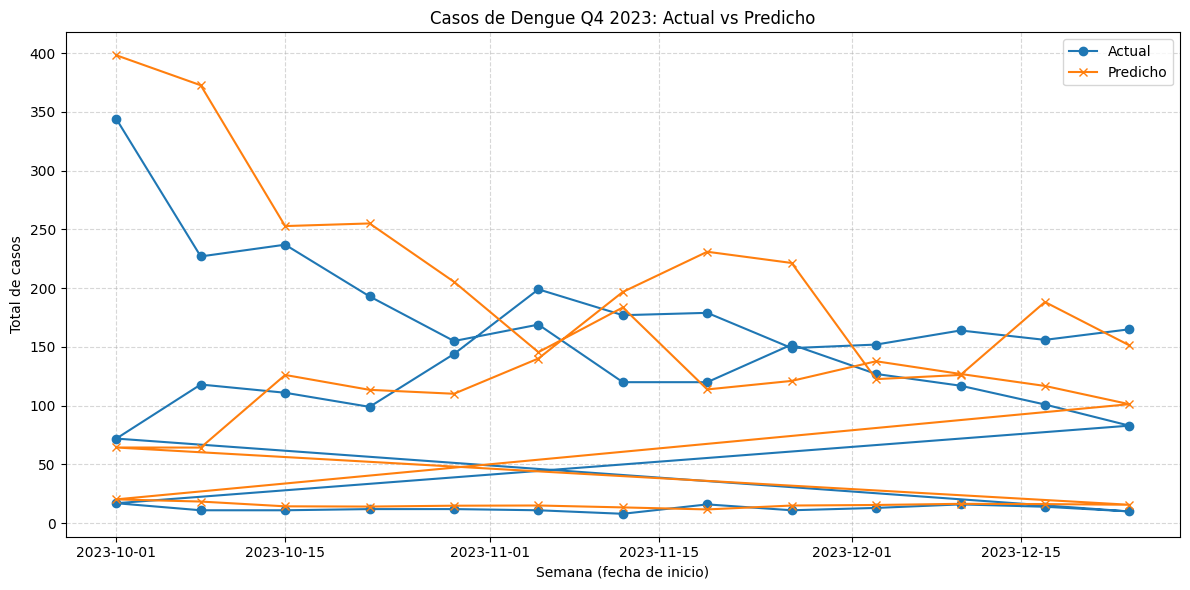

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# ——— Supuestos:
#   * 'best' es tu pipeline RandomForest/XGBoost ya entrenado
#   * X_hold y y_hold contienen tus features y target del Q4 2023

# 1. Genera predicciones
pred_hold = best.predict(X_hold)

# 2. Construye el DataFrame
df_hold_pred = X_hold.copy().reset_index(drop=True)
df_hold_pred['actual']    = y_hold.reset_index(drop=True)
df_hold_pred['predicted'] = pred_hold

# (Si tienes 'ano' y 'semana' en X_hold)
df_hold_pred['week_start'] = (
    pd.to_datetime(df_hold_pred['ano'], format='%Y') +
    pd.to_timedelta((df_hold_pred['semana'] - 1) * 7, unit='D')
)

# 3. Muestra la tabla
display(df_hold_pred.head(10))   # o sin head() para ver todo

# 4. Gráfico de tendencia
plt.figure(figsize=(12,6))
plt.plot(df_hold_pred['week_start'], df_hold_pred['actual'],    label='Actual',    marker='o')
plt.plot(df_hold_pred['week_start'], df_hold_pred['predicted'], label='Predicho', marker='x')
plt.title('Casos de Dengue Q4 2023: Actual vs Predicho')
plt.xlabel('Semana (fecha de inicio)')
plt.ylabel('Total de casos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
X_train

,ano,semana,sin_sem,cos_sem,precip_mean,temp_max_mean,temp_min_mean,hum_mean,altitud_mean,lag_1,lag_2,lag_3,lag_4,roll_4,flag_covid_mod,oni_mean,total_mean,climadjust_mean,macro_region
0,2018,5,5.680647e-01,0.822984,0.000000,33.857143,21.657143,70.980952,53.000000,2.0,1.0,2.0,4.0,2.00,0.0,-0.98,25.57,26.55,costa_norte
1,2018,6,6.631227e-01,0.748511,0.125000,34.542857,22.335714,67.525000,56.750000,3.0,2.0,1.0,2.0,2.50,0.0,-0.78,25.98,26.76,costa_norte
2,2018,7,7.485107e-01,0.663123,1.380000,34.701429,22.784286,71.829286,28.500000,4.0,3.0,2.0,1.0,3.25,0.0,-0.78,25.98,26.76,costa_norte
3,2018,8,8.229839e-01,0.568065,0.042857,31.914286,23.657143,88.414286,9.000000,4.0,4.0,3.0,2.0,3.50,0.0,-0.78,25.98,26.76,costa_norte
4,2018,9,8.854560e-01,0.464723,0.000000,34.828571,21.085714,65.071429,23.500000,3.0,4.0,4.0,3.0,3.25,0.0,-0.78,25.98,26.76,costa_norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2020,24,2.393157e-01,-0.970942,16.116883,27.565584,16.107468,85.866234,336.100000,17.0,15.0,30.0,31.0,20.50,1.0,-0.34,27.39,27.73,selva
414,2020,25,1.205367e-01,-0.992709,5.406122,24.526327,15.493265,87.038776,306.384615,20.0,17.0,15.0,30.0,16.25,1.0,-0.34,27.39,27.73,selva
415,2020,26,-3.216245e-16,-1.000000,7.505102,19.900255,14.589592,88.647959,154.333333,13.0,20.0,17.0,15.0,16.25,1.0,-0.34,27.39,27.73,selva
416,2020,27,-1.205367e-01,-0.992709,17.379762,18.688155,14.404792,85.675000,197.176471,15.0,13.0,20.0,17.0,16.25,1.0,-0.30,26.99,27.29,selva


In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor

# ========= 1) Carga y feature engineering temporal =========
# Asume que `df` ya contiene tus datos hasta 2023 con columna 'total_casos'
# df = pd.read_csv("histórico.csv", sep=";")

df['sin_sem'] = np.sin(2 * np.pi * df['semana'] / 52)
df['cos_sem'] = np.cos(2 * np.pi * df['semana'] / 52)
for lag in range(1,5):
    df[f'lag_{lag}'] = df['total_casos'].shift(lag)
df['roll_4'] = df['total_casos'].rolling(4).mean()
df = df.dropna().reset_index(drop=True)

num_feats = [
    'ano','semana','sin_sem','cos_sem',
    'precip_mean','temp_max_mean','temp_min_mean','hum_mean','altitud_mean',
    'lag_1','lag_2','lag_3','lag_4','roll_4','flag_covid_mod' ,'oni_mean',
'total_mean','climadjust_mean'
]
cat_feats = ['macro_region']

# train / hold-out split
avail = df[(df['ano'] < 2023) | ((df['ano'] == 2023) & (df['semana'] <= 39))]
hold  = df[(df['ano'] == 2023) & (df['semana'] >= 40)]
X_av,   y_av   = avail[num_feats + cat_feats], avail['total_casos']
X_hold, y_hold = hold [num_feats + cat_feats], hold ['total_casos']
X_train, X_test, y_train, y_test = train_test_split(
    X_av, y_av, test_size=0.30, shuffle=False
)

# preprocessing pipeline
pre = ColumnTransformer([
    ('num', StandardScaler(), num_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feats)
])
tscv = TimeSeriesSplit(n_splits=5)

def fit_search(name, base_model, param_dist=None, n_iter=20):
    pipe = Pipeline([('prep', pre), ('model', base_model)])
    if param_dist:
        rs = RandomizedSearchCV(
            pipe, param_distributions=param_dist,
            n_iter=n_iter, cv=tscv,
            scoring='neg_root_mean_squared_error',
            random_state=7, n_jobs=-1
        )
        rs.fit(X_train, y_train)
        best = rs.best_estimator_
        best_params = rs.best_params_
    else:
        best = pipe.fit(X_train, y_train)
        best_params = {}

    def eval_block(X, y):
        p = best.predict(X)
        # Calculate overall metrics
        overall_rmse = np.sqrt(mean_squared_error(y, p))
        overall_mae = mean_absolute_error(y, p)
        overall_r2 = r2_score(y, p)

        # Calculate regional metrics
        regional_metrics = {}
        X_evaluated = X.copy()
        X_evaluated['actual'] = y
        X_evaluated['predicted'] = p

        for region, g in X_evaluated.groupby('macro_region'):
            regional_metrics[region] = {
                'rmse': np.sqrt(mean_squared_error(g['actual'], g['predicted'])),
                'mae': mean_absolute_error(g['actual'], g['predicted']),
                'r2': r2_score(g['actual'], g['predicted'])
            }

        return {
            'overall': {'rmse': overall_rmse, 'mae': overall_mae, 'r2': overall_r2},
            'regional': regional_metrics
        }


    test_m = eval_block(X_test,  y_test)
    hold_m = eval_block(X_hold, y_hold)

    return {
        'modelo':      name,
        'best_params': best_params,
        'test_metrics': test_m,
        'hold_metrics': hold_m,
        'estimator':   best
    }

# ============= Entrenamiento de modelos =============
results = []

# Random Forest
rf_param = {
    'model__n_estimators':     [200,400,600],
    'model__max_depth':        [5,10,15,None],
    'model__min_samples_leaf': [1,2,4],
    'model__min_samples_split':[2,5,10],
    'model__max_features':     [None,'sqrt']
}
results.append(fit_search('RF', RandomForestRegressor(random_state=7), rf_param, n_iter=20))

# CART
cart_param = {
    'model__max_depth':        [3,5,8,None],
    'model__min_samples_leaf': [1,2,4],
    'model__min_samples_split':[2,5,10],
    'model__ccp_alpha':        [0.0,0.001,0.01]
}
results.append(fit_search('CART', DecisionTreeRegressor(random_state=7), cart_param, n_iter=20))

# XGB default (sin tuning)
results.append(fit_search(
    'XGB_default',
    XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=7, n_jobs=-1),
    param_dist=None
))

# XGB con RandomizedSearch
xgb_param = {
    'model__n_estimators':     [300,500,800],
    'model__max_depth':        [3,5,7],
    'model__learning_rate':    [0.03,0.1,0.2],
    'model__subsample':        [0.7,1.0],
    'model__colsample_bytree': [0.7,1.0],
    'model__gamma':            [0.0,0.1]
}
xgb_base = XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=7, n_jobs=-1)
results.append(fit_search('XGB_tuned', xgb_base, xgb_param, n_iter=20))

# AdaBoost
ada_param = {
    'model__n_estimators':         [50,100,200],
    'model__learning_rate':        [0.01,0.1,1.0],
    'model__estimator__max_depth': [1,3,5]
}
ada_base = AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=7), random_state=7)
results.append(fit_search('AdaBoost', ada_base, ada_param, n_iter=20))

# XGB personalizado (fit directo)
xgb_custom = XGBRegressor(
    booster='gbtree',
    objective='reg:squarederror', # Corrected typo: changed 'reg:squareerror' to 'reg:squarederror'
    max_depth=4,
    learning_rate=0.025,
    n_estimators=2000,
    random_state=42,
    min_child_weight=10,
    subsample=0.7,
    colsample_bytree=0.8,
    eval_metric='rmse',
    n_jobs=-1
)
results.append(fit_search('XGB_custom', xgb_custom, param_dist=None, n_iter=1))


# ========= 2) Consolidar resultados y elegir mejor =========
# Consolidate overall results
res_df_overall = pd.DataFrame([{
    'modelo':    r['modelo'],
    'rmse_test': r['test_metrics']['overall']['rmse'],
    'r2_test':   r['test_metrics']['overall']['r2'],
    'mae_test':  r['test_metrics']['overall']['mae'],
    'rmse_hold': r['hold_metrics']['overall']['rmse'],
    'r2_hold':   r['hold_metrics']['overall']['r2'],
    'mae_hold':  r['hold_metrics']['overall']['mae']
} for r in results]).sort_values('r2_hold', ascending=False)
print("Overall Metrics on Hold-out Set:")
print(res_df_overall.to_string(index=False))

best_name_overall = res_df_overall.iloc[0]['modelo']
print(f"\nBest Model Overall on HOLD: {best_name_overall}")

# Consolidate regional results for the hold-out set
regional_results_list = []
for r in results:
    model_name = r['modelo']
    for region, metrics in r['hold_metrics']['regional'].items():
        regional_results_list.append({
            'modelo': model_name,
            'macro_region': region,
            'rmse_hold': metrics['rmse'],
            'mae_hold': metrics['mae'],
            'r2_hold': metrics['r2']
        })

res_df_regional = pd.DataFrame(regional_results_list)

print("\nRegional Metrics on Hold-out Set:")
# Pivot the table for better readability
res_df_regional_pivot = res_df_regional.pivot_table(
    index='modelo',
    columns='macro_region',
    values=['rmse_hold', 'mae_hold', 'r2_hold']
)
print(res_df_regional_pivot.to_string())


# Extraer pipeline ganador (using the overall best for now)
best_pipeline = next(r['estimator'] for r in results if r['modelo'] == best_name_overall)

Overall Metrics on Hold-out Set:
     modelo  rmse_test  r2_test  mae_test  rmse_hold  r2_hold  mae_hold
 XGB_custom  43.431396 0.835114 31.136044  35.530271 0.806848 28.283241
   AdaBoost  47.373495 0.803823 33.376424  37.333524 0.786745 25.945410
         RF  45.157838 0.821744 31.632679  40.775491 0.745610 26.025154
  XGB_tuned  40.646950 0.855578 28.917492  40.938943 0.743566 26.515825
XGB_default  48.269059 0.796336 35.533516  46.336598 0.671489 31.355450
       CART  69.370979 0.579339 53.130483  65.578250 0.342006 46.472886

Best Model Overall on HOLD: XGB_custom

Regional Metrics on Hold-out Set:
                mae_hold                                  r2_hold                               rmse_hold                             
macro_region costa_norte costa_norte_chico      selva costa_norte costa_norte_chico     selva costa_norte costa_norte_chico      selva
modelo                                                                                                                

Feature Importances:


,Feature,Importance
9,lag_1,0.397944
13,roll_4,0.280657
10,lag_2,0.113114
12,lag_4,0.029483
17,climadjust_mean,0.023726
6,temp_min_mean,0.022534
11,lag_3,0.020138
5,temp_max_mean,0.015586
15,oni_mean,0.015030
3,cos_sem,0.013764


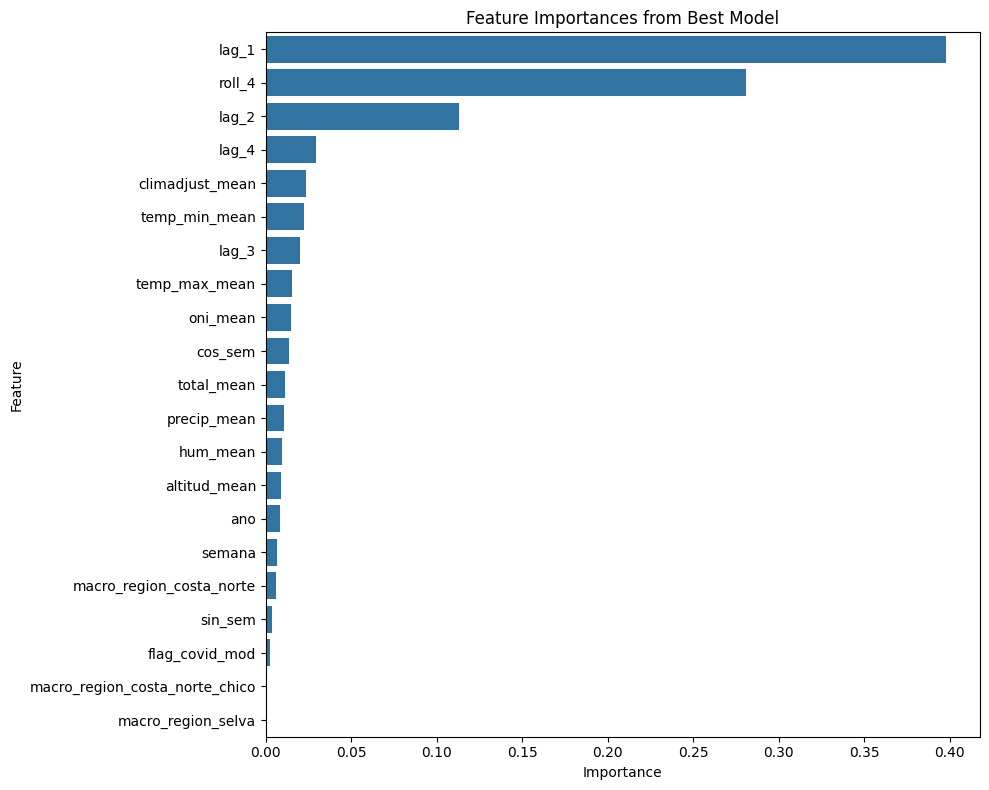

In [ ]:
# Get the fitted model from the pipeline
fitted_model = best_pipeline.named_steps['model']
# Get the fitted preprocessor from the pipeline
fitted_preprocessor = best_pipeline.named_steps['prep']


# Get feature importances
if hasattr(fitted_model, 'feature_importances_'):
    importances = fitted_model.feature_importances_
elif hasattr(fitted_model, 'coef_'):
    # For linear models (like Lasso or Ridge), use coefficients as a measure of importance
    importances = fitted_model.coef_
    # For Lasso, coef_ can be sparse, convert to dense array
    if isinstance(importances, np.sparse.ndarray):
        importances = importances.toarray().flatten()
else:
    print("The best model does not have feature importances or coefficients.")
    importances = None

if importances is not None:
    # Get feature names after preprocessing
    # Get numerical feature names
    num_feature_names = num_feats
    # Get categorical feature names after one-hot encoding from the fitted preprocessor
    cat_feature_names = list(fitted_preprocessor.named_transformers_['cat'].get_feature_names_out(cat_feats))

    # Combine all feature names
    feature_names = num_feature_names + cat_feature_names


    # Create a DataFrame for better visualization
    feature_importances_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Sort by importance
    feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

    # Display the feature importances
    print("Feature Importances:")
    display(feature_importances_df)

    # Optional: Plot feature importances
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
    plt.title('Feature Importances from Best Model')
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Feature Engineering ===
df['sin_sem'] = np.sin(2*np.pi*df['semana']/52)
df['cos_sem'] = np.cos(2*np.pi*df['semana']/52)
for lag in range(1,5):
    df[f'lag_{lag}'] = df['total_casos'].shift(lag)
df['roll_4'] = df['total_casos'].rolling(4).mean()
df = df.dropna().reset_index(drop=True)

num_feats = [
    'ano','semana','sin_sem','cos_sem',
    'precip_mean','temp_max_mean','temp_min_mean','hum_mean','altitud_mean',
    'lag_1','lag_2','lag_3','lag_4','roll_4','flag_covid_mod' ,'oni_mean',
'total_mean','climadjust_mean'
]
cat_feats = ['macro_region']

avail = df[(df['ano']<2023) | ((df['ano']==2023)&(df['semana']<=39))]
hold  = df[(df['ano']==2023)&(df['semana']>=40)]
X_av,   y_av   = avail[num_feats+cat_feats], avail['total_casos']
X_hold, y_hold = hold [num_feats+cat_feats], hold ['total_casos']
X_train, X_test, y_train, y_test = train_test_split(X_av, y_av, test_size=0.30, shuffle=False)

# === Preprocessing ===
pre = ColumnTransformer([
    ('num', StandardScaler(), num_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feats)
])

tscv = TimeSeriesSplit(n_splits=5)

def fit_search(name, base_model, param_dist=None, n_iter=20):
    pipe = Pipeline([('prep', pre), ('model', base_model)])
    if param_dist:
        rs = RandomizedSearchCV(
            pipe, param_distributions=param_dist, n_iter=n_iter,
            cv=tscv, scoring='neg_root_mean_squared_error',
            random_state=7, n_jobs=-1
        )
        rs.fit(X_train, y_train)
        best = rs.best_estimator_
        best_params = rs.best_params_
    else:
        best = pipe.fit(X_train, y_train)
        best_params = {}

    def eval_block(X, y):
        p = best.predict(X)
        # Calculate overall metrics
        overall_rmse = np.sqrt(mean_squared_error(y, p))
        overall_mae = mean_absolute_error(y, p)
        overall_r2 = r2_score(y, p)

        # Calculate regional metrics
        regional_metrics = {}
        X_evaluated = X.copy()
        X_evaluated['actual'] = y
        X_evaluated['predicted'] = p

        for region, g in X_evaluated.groupby('macro_region'):
            regional_metrics[region] = {
                'rmse': np.sqrt(mean_squared_error(g['actual'], g['predicted'])),
                'mae': mean_absolute_error(g['actual'], g['predicted']),
                'r2': r2_score(g['actual'], g['predicted'])
            }

        return {
            'overall': {'rmse': overall_rmse, 'mae': overall_mae, 'r2': overall_r2},
            'regional': regional_metrics
        }


    test_m = eval_block(X_test,  y_test)
    hold_m = eval_block(X_hold, y_hold)
    return {
        'modelo': name,
        'best_params': best_params,
        'test_metrics': test_m,
        'hold_metrics': hold_m,
        'estimator': best
    }

results = []

# — Lineales y KNN (sin Linear directo) —
results.append(fit_search('Ridge', Ridge(random_state=7), {'model__alpha': [0.1,1.0,10.0]}, n_iter=10))
results.append(fit_search('Lasso', Lasso(random_state=7), {'model__alpha': [0.001,0.01,0.1,1.0]}, n_iter=10))
results.append(fit_search('KNN', KNeighborsRegressor(), {'model__n_neighbors': [3,5,7,9]}, n_iter=10))

# — Consolidar resultados (sin Linear) —
# Consolidate overall results
res_df_overall = pd.DataFrame([{
    'modelo':    r['modelo'],
    'rmse_test': r['test_metrics']['overall']['rmse'],
    'r2_test':   r['test_metrics']['overall']['r2'],
    'mae_test':  r['test_metrics']['overall']['mae'],
    'rmse_hold': r['hold_metrics']['overall']['rmse'],
    'r2_hold':   r['hold_metrics']['overall']['r2'],
    'mae_hold':  r['hold_metrics']['overall']['mae']
} for r in results]).sort_values('rmse_hold')

print("Overall Metrics on Hold-out Set:")
print(res_df_overall.to_string(index=False))

best_name_overall = res_df_overall.iloc[0]['modelo']
print(f"\nBest Model Overall on HOLD: {best_name_overall}")

# Consolidate regional results for the hold-out set
regional_results_list = []
for r in results:
    model_name = r['modelo']
    for region, metrics in r['hold_metrics']['regional'].items():
        regional_results_list.append({
            'modelo': model_name,
            'macro_region': region,
            'rmse_hold': metrics['rmse'],
            'mae_hold': metrics['mae'],
            'r2_hold': metrics['r2']
        })

res_df_regional = pd.DataFrame(regional_results_list)

print("\nRegional Metrics on Hold-out Set:")
# Pivot the table for better readability
res_df_regional_pivot = res_df_regional.pivot_table(
    index='modelo',
    columns='macro_region',
    values=['rmse_hold', 'mae_hold', 'r2_hold']
)
print(res_df_regional_pivot.to_string())

best_row = res_df_overall.iloc[0]
print("\nMejor en HOLD:", best_row['modelo'])
best_lineal = [r for r in results if r['modelo']==best_row['modelo']][0]['estimator']
print("Best params:", [r for r in results if r['modelo']==best_row['modelo']][0]['best_params'])

Overall Metrics on Hold-out Set:
modelo  rmse_test   r2_test   mae_test  rmse_hold   r2_hold  mae_hold
 Lasso   0.874105  0.999933   0.665739   0.635006  0.999938  0.492379
 Ridge   5.321029  0.997509   4.299040   5.036315  0.996119  3.793293
   KNN 138.128427 -0.678549 109.310559  87.348469 -0.167381 69.829060

Best Model Overall on HOLD: Lasso

Regional Metrics on Hold-out Set:
                mae_hold                                   r2_hold                                rmse_hold                              
macro_region costa_norte costa_norte_chico       selva costa_norte costa_norte_chico      selva costa_norte costa_norte_chico       selva
modelo                                                                                                                                   
KNN            77.743590         13.307692  118.435897   -0.594378        -27.727357 -11.898494   86.321403         13.561824  123.506912
Lasso           0.653026          0.211219    0.612890    0.99985

In [ ]:
# 1. Obtener el modelo final (sin preprocesador)
best_model = best_lineal.named_steps['model']

# 2. Obtener el nombre de columnas procesadas
# Access the fitted transformers using the correct attribute
ohe = best_lineal.named_steps['prep'].named_transformers_['cat']
cat_ohe_cols = list(ohe.get_feature_names_out(cat_feats))
all_feats = num_feats + cat_ohe_cols

# 3. Obtener los coeficientes y ordenarlos
coefs = pd.Series(best_model.coef_, index=all_feats)
coefs_sorted = coefs.abs().sort_values(ascending=False)

# Mostrar las 10 variables más influyentes
print("\nTop 10 variables más influyentes en el modelo:", best_row['modelo'])
print(coefs_sorted.head(10))


Top 10 variables más influyentes en el modelo: Lasso
roll_4                989.470848
lag_3                 253.490930
lag_2                 251.463909
lag_1                 247.914762
ano                     0.256438
temp_min_mean           0.235225
macro_region_selva      0.074656
altitud_mean            0.074634
climadjust_mean         0.068195
cos_sem                 0.041881
dtype: float64


In [ ]:
hold

,macro_region,ano,semana,total_casos,precip_mean,temp_max_mean,temp_min_mean,hum_mean,oni_mean,climadjust_mean,total_mean,altitud_mean,flag_covid_mod,sin_sem,cos_sem,lag_1,lag_2,lag_3,lag_4,roll_4
208,costa_norte,2023,40,344,0.220346,28.949089,20.048098,79.647920,1.72,26.72,28.44,100.299419,0.0,-9.927089e-01,0.120537,377.0,383.0,503.0,579.0,401.75
209,costa_norte,2023,41,227,0.288168,28.133301,19.620053,80.683213,1.72,26.72,28.44,64.308370,0.0,-9.709418e-01,0.239316,344.0,377.0,383.0,503.0,332.75
210,costa_norte,2023,42,237,0.000123,29.705687,20.149822,78.789101,1.72,26.72,28.44,74.717300,0.0,-9.350162e-01,0.354605,227.0,344.0,377.0,383.0,296.25
211,costa_norte,2023,43,193,0.117494,28.381012,19.563159,79.125499,1.72,26.72,28.44,100.797927,0.0,-8.854560e-01,0.464723,237.0,227.0,344.0,377.0,250.25
212,costa_norte,2023,44,155,0.000000,28.520049,18.467211,79.223345,1.72,26.72,28.44,99.322581,0.0,-8.229839e-01,0.568065,193.0,237.0,227.0,344.0,203.00
213,costa_norte,2023,45,169,0.000000,28.303061,18.537100,78.642857,2.02,26.70,28.72,106.041420,0.0,-7.485107e-01,0.663123,155.0,193.0,237.0,227.0,188.50
214,costa_norte,2023,46,120,-11.058873,27.260643,18.268310,78.901871,2.02,26.70,28.72,154.250000,0.0,-6.631227e-01,0.748511,169.0,155.0,193.0,237.0,159.25
215,costa_norte,2023,47,120,0.000000,28.717310,18.521476,75.417857,2.02,26.70,28.72,153.550000,1.0,-5.680647e-01,0.822984,120.0,169.0,155.0,193.0,141.00
216,costa_norte,2023,48,152,0.000294,29.253339,18.815585,76.096773,2.02,26.70,28.72,126.414474,0.0,-4.647232e-01,0.885456,120.0,120.0,169.0,155.0,140.25
217,costa_norte,2023,49,127,0.026029,28.444574,18.721282,77.017433,2.02,26.60,28.63,161.118110,0.0,-3.546049e-01,0.935016,152.0,120.0,120.0,169.0,129.75


In [ ]:
# ================== PREDICCIÓN 2024 SIN RE-ENTRENAR ==================
import pandas as pd, numpy as np
from scipy.stats import mode

RUTA_2024 = "https://raw.githubusercontent.com/galuf/dengueML/refs/heads/main/2024/2024_final.csv"     # <-- cambia si es otra ruta
SALIDA    = "predicciones_2024_arbol.csv"

# columnas mínimas requeridas en el CSV 2024 (excluding total_casos as we'll predict it)
req_cols = {
    'ano','semana',
    'precip_mean','temp_max_mean','temp_min_mean','hum_mean','macro_region','flag_covid_mod',
    'oni_mean','total_mean','climadjust_mean'
}
df2024 = pd.read_csv(RUTA_2024, sep=',')

df2024.columns = [c.strip() for c in df2024.columns]

faltan = sorted(list(req_cols - set(df2024.columns)))
if faltan:
    raise ValueError(f"Al CSV 2024 le faltan columnas: {faltan}")

# Impute 'altitud_mean' if missing or not in original data
if 'altitud_mean' not in df2024.columns and 'altitud_mean' in num_feats:
    # Calculate median altitude from the original training data for imputation
    if 'altitud_mean' in df_macro_sem_dengue.columns:
        med_map = df_macro_sem_dengue.groupby('macro_region')['altitud_mean'].median().to_dict()
        df2024['altitud_mean'] = df2024['macro_region'].map(med_map)
        df2024['altitud_mean'] = df2024['altitud_mean'].fillna(df_macro_sem_dengue['altitud_mean'].median())
    else:
        # If 'altitud_mean' was in num_feats but not in the original training data, fill with median from df_macro_sem_dengue
        df2024['altitud_mean'] = df_macro_sem_dengue['altitud_mean'].median()
elif 'altitud_mean' not in df2024.columns and 'altitud_mean' not in num_feats:
    # If altitud_mean is not in num_feats, it's not needed for prediction, do nothing
    pass
elif 'altitud_mean' in df2024.columns and 'altitud_mean' not in num_feats:
     # If altitud_mean is in df2024 but not in num_feats, it's not needed for prediction, drop it
     df2024 = df2024.drop(columns=['altitud_mean'])


# Impute 'flag_covid_mod' using the mode of 'flag_covid' from the original data by 'macro_region'
if 'flag_covid_mod' not in df2024.columns and 'flag_covid' in df_dengue_anl.columns:
    # Calculate the mode of flag_covid for each macro_region from the combined dengue and covid data
    mode_map = df_dengue_anl.groupby('macro_region')['flag_covid'].apply(lambda x: mode(x, keepdims=True).mode[0]).to_dict()
    df2024['flag_covid_mod'] = df2024['macro_region'].map(mode_map)
    # Fill any remaining NaNs (if a macro_region in df2024 wasn't in df_dengue_anl) with the overall mode or 0
    df2024['flag_covid_mod'] = df2024['flag_covid_mod'].fillna(mode(df_dengue_anl['flag_covid'], keepdims=True).mode[0])
elif 'flag_covid_mod' not in df2024.columns:
     # If flag_covid was not in df_dengue_anl, fill with 0
     df2024['flag_covid_mod'] = 0.0


# Ensure same type
df2024['macro_region'] = df2024['macro_region'].astype(str)
#df2024 =df2024[df2024['macro_region']!='otras']
# For constructing lags correctly, concatenate training (<=2023) + 2024

# Define cols_base_train based on df_macro_sem_dengue
cols_base_train = [col for col in df_macro_sem_dengue.columns if col in num_feats + cat_feats + ['total_casos']]

# Select only the necessary columns from df_macro_sem_dengue for concatenation
df_train_base = df_macro_sem_dengue[cols_base_train].copy()


# Prepare df_2024_base with required columns for merging and feature engineering
cols_base_2024 = [
    'macro_region','ano','semana',
    'precip_mean','temp_max_mean','temp_min_mean','hum_mean','flag_covid_mod', # Include flag_covid_mod here
    'oni_mean','total_mean','climadjust_mean'
]
if 'altitud_mean' in df2024.columns:
    cols_base_2024.append('altitud_mean')

df_2024_base  = df2024[cols_base_2024].copy()
# Add 'total_casos' column to df_2024_base and set to NaN for concatenation
df_2024_base['total_casos'] = np.nan

df_all = pd.concat([hold, df_2024_base], ignore_index=True)
df_all = df_all.sort_values(['macro_region','ano','semana']).reset_index(drop=True)
print(df_all)
# 2. Agregar variables cíclicas una vez
df_all['sin_sem'] = np.sin(2 * np.pi * df_all['semana'] / 52.0)
df_all['cos_sem'] = np.cos(2 * np.pi * df_all['semana'] / 52.0)

# 3. Inicializar resultado
predicciones = []

# 4. Iterar por macro_región
for region, df_region in df_all.groupby('macro_region'):
    df_region = df_region.copy().reset_index(drop=True)

    # 4.1 Obtener semanas de predicción
    idx_2024 = (df_region['ano'] == 2024) & (df_region['semana'] <= 52)
    semanas_pred = df_region[idx_2024].index.tolist()
    # 4.2 Generar lags/roll y predecir semana a semana
    for idx in semanas_pred:
        # Generar lags y roll a partir de semanas anteriores
        prev_vals = df_region.loc[:idx - 1, 'total_casos'].tolist()

        for l in range(1, 5):
            lag_name = f'lag_{l}'
            if len(prev_vals) >= l:
                df_region.at[idx, lag_name] = prev_vals[-l]
            else:
                df_region.at[idx, lag_name] = np.nan

        # Rolling 4
        if len(prev_vals) >= 4:
            df_region.at[idx, 'roll_4'] = np.mean(prev_vals[-4:])
        else:
            df_region.at[idx, 'roll_4'] = np.nan

        # Verifica si tienes todos los features
        if df_region.loc[idx, num_feats + cat_feats].isnull().any():
            continue  # skip si faltan lags

        # Extraer features
        X_pred = df_region.loc[[idx], num_feats + cat_feats]

        # Predecir
        y_hat = int(round(max(0, best_pipeline.predict(X_pred)[0])))

        df_region.at[idx, 'total_casos'] = y_hat

        # Guardar resultado
        predicciones.append({
            'ano': df_region.at[idx, 'ano'],
            'semana': df_region.at[idx, 'semana'],
            'macro_region': region,
            'y_pred': y_hat
        })

# 5. Guardar resultados
df_preds_tree = pd.DataFrame(predicciones)
df_preds_tree = df_preds_tree[df_preds_tree['ano'] != 2025 ]
df_preds_tree.to_csv(SALIDA, index=False)
print("Guardado:", SALIDA)

    macro_region   ano  semana  total_casos  precip_mean  temp_max_mean  \
0    costa_norte  2023      40        344.0     0.220346      28.949089   
1    costa_norte  2023      41        227.0     0.288168      28.133301   
2    costa_norte  2023      42        237.0     0.000123      29.705687   
3    costa_norte  2023      43        193.0     0.117494      28.381012   
4    costa_norte  2023      44        155.0     0.000000      28.520049   
..           ...   ...     ...          ...          ...            ...   
190        selva  2024      48          NaN     3.723643      20.092484   
191        selva  2024      49          NaN     2.211462      20.018221   
192        selva  2024      50          NaN     7.346304      19.647783   
193        selva  2024      51          NaN     9.019844      19.997903   
194        selva  2024      52          NaN     6.883137      20.170891   

     temp_min_mean   hum_mean  oni_mean  climadjust_mean  total_mean  \
0        20.048098  79.6479

In [ ]:
df_preds_tree.ano.value_counts()

,count
ano,
2024,156


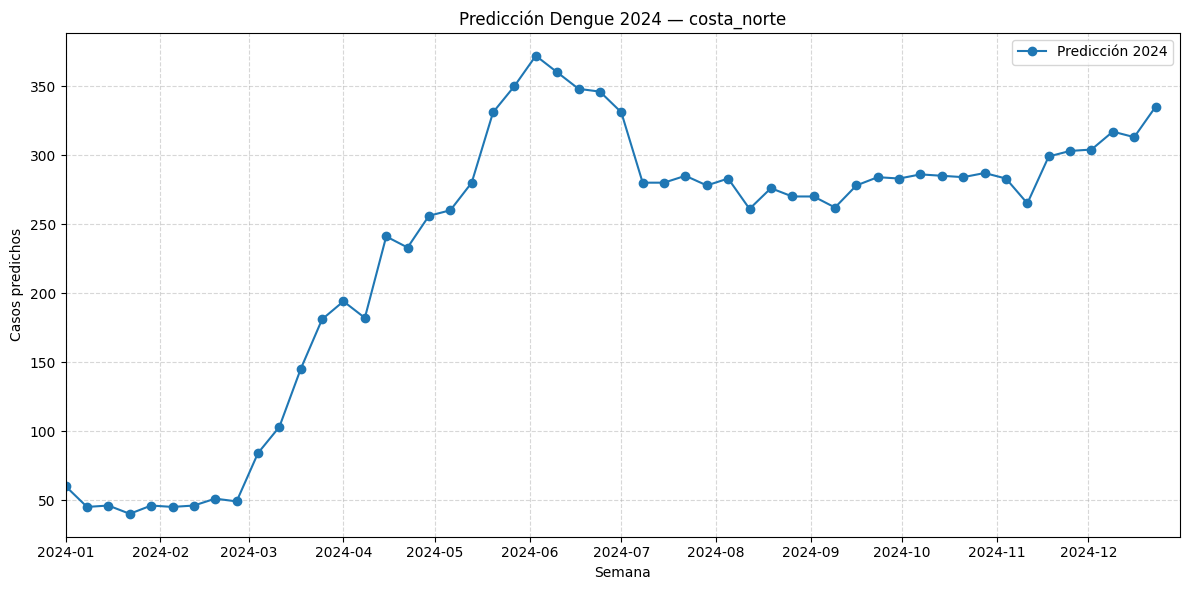

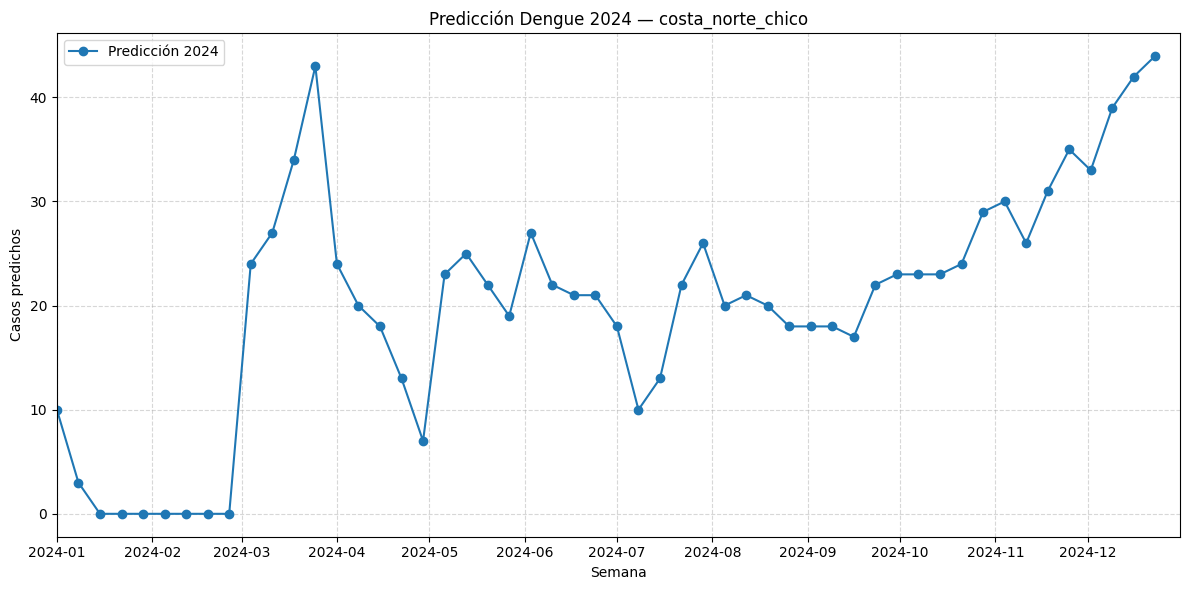

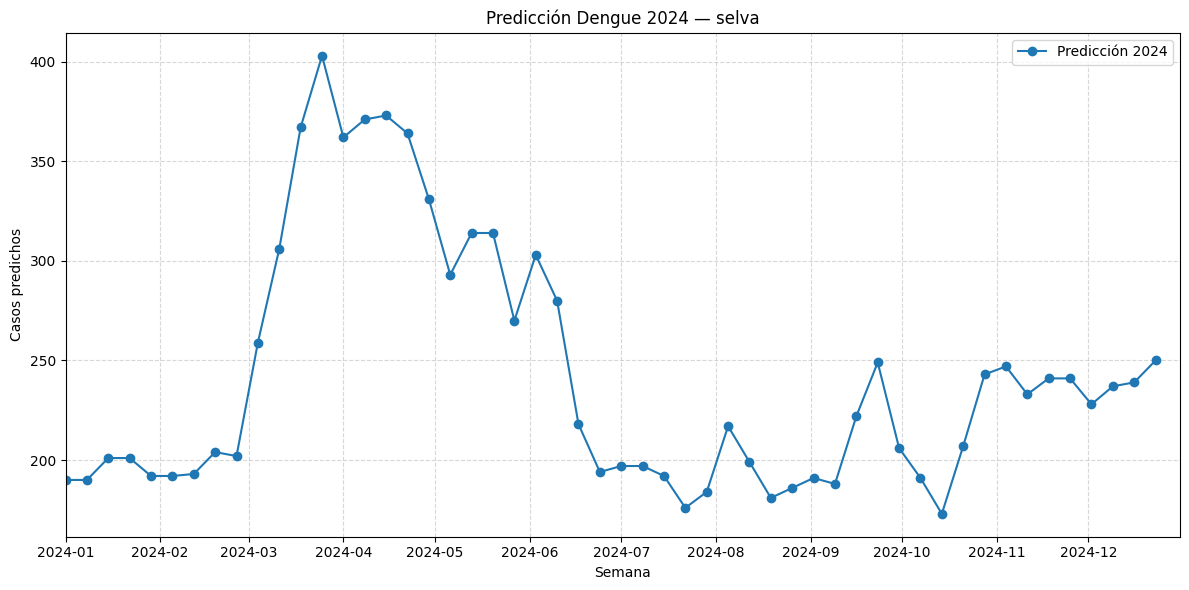

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Generar fecha aproximada del inicio de semana ISO
df_preds_tree['week_start'] = pd.to_datetime(df_preds_tree['ano'].astype(str) + '-W' + df_preds_tree['semana'].astype(str).str.zfill(2) + '-1', format='%G-W%V-%u')
df_preds_tree = df_preds_tree[df_preds_tree['week_start'].dt.year == 2024]

# Ordenar por fecha por si acaso
df_preds_tree = df_preds_tree.sort_values(['macro_region', 'week_start'])

# Gráfico por macro región
for mr, g in df_preds_tree.groupby('macro_region'):
    plt.figure(figsize=(12, 6))
    plt.plot(g['week_start'], g['y_pred'], marker='o', label='Predicción 2024')
    plt.title(f'Predicción Dengue 2024 — {mr}')
    plt.xlabel('Semana')
    plt.ylabel('Casos predichos')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.xlim(pd.to_datetime('2024-01-01'), pd.to_datetime('2024-12-31'))  # 💥 Esto es lo que faltaba
    plt.tight_layout()
    plt.show()



In [ ]:
# ================== PREDICCIÓN 2024 SIN RE-ENTRENAR ==================
import pandas as pd, numpy as np
from scipy.stats import mode
from IPython.display import display # Import display

RUTA_2024 = "https://raw.githubusercontent.com/galuf/dengueML/refs/heads/main/2024/2024_final.csv"     # <-- cambia si es otra ruta
SALIDA = "predicciones_2024_lasso.csv"

# columnas mínimas requeridas in the CSV 2024 (excluding total_casos as we'll predict it)
req_cols = {
    'ano','semana',
    'precip_mean','temp_max_mean','temp_min_mean','hum_mean','macro_region','flag_covid_mod',
    'oni_mean','total_mean','climadjust_mean'
}
df2024 = pd.read_csv(RUTA_2024, sep=',')

df2024.columns = [c.strip() for c in df2024.columns]

faltan = sorted(list(req_cols - set(df2024.columns)))
if faltan:
    raise ValueError(f"Al CSV 2024 le faltan columnas: {faltan}")

# Impute 'altitud_mean' if missing or not in original data
if 'altitud_mean' not in df2024.columns and 'altitud_mean' in num_feats:
    # Calculate median altitude from the original training data for imputation
    if 'altitud_mean' in df_macro_sem_dengue.columns:
        med_map = df_macro_sem_dengue.groupby('macro_region')['altitud_mean'].median().to_dict()
        df2024['altitud_mean'] = df2024['macro_region'].map(med_map)
        df2024['altitud_mean'] = df2024['altitud_mean'].fillna(df_macro_sem_dengue['altitud_mean'].median())
    else:
        # If 'altitud_mean' was in num_feats but not in the original training data, fill with median from df_macro_sem_dengue
        df2024['altitud_mean'] = df_macro_sem_dengue['altitud_mean'].median()
elif 'altitud_mean' not in df2024.columns and 'altitud_mean' not in num_feats:
    # If altitud_mean is not in num_feats, it's not needed for prediction, do nothing
    pass
elif 'altitud_mean' in df2024.columns and 'altitud_mean' not in num_feats:
     # If altitud_mean is in df2024 but not in num_feats, it's not needed for prediction, drop it
     df2024 = df2024.drop(columns=['altitud_mean'])


# Impute 'flag_covid_mod' using the mode of 'flag_covid' from the original data by 'macro_region'
if 'flag_covid_mod' not in df2024.columns and 'flag_covid' in df_dengue_anl.columns:
    # Calculate the mode of flag_covid for each macro_region from the combined dengue and covid data
    mode_map = df_dengue_anl.groupby('macro_region')['flag_covid'].apply(lambda x: mode(x, keepdims=True).mode[0]).to_dict()
    df2024['flag_covid_mod'] = df2024['macro_region'].map(mode_map)
    # Fill any remaining NaNs (if a macro_region in df2024 wasn't in df_dengue_anl) with the overall mode or 0
    df2024['flag_covid_mod'] = df2024['flag_covid_mod'].fillna(mode(df_dengue_anl['flag_covid'], keepdims=True).mode[0])
elif 'flag_covid_mod' not in df2024.columns:
     # If flag_covid was not in df_dengue_anl, fill with 0
     df2024['flag_covid_mod'] = 0.0


# Ensure same type
df2024['macro_region'] = df2024['macro_region'].astype(str)
#df2024 =df2024[df2024['macro_region']!='otras']
# For constructing lags correctly, concatenate training (<=2023) + 2024

# Define columns needed from df_macro_sem_dengue for concatenation (excluding lags, roll_4, sin_sem, cos_sem)
cols_for_concat_2023 = [col for col in df_macro_sem_dengue.columns if col in ['macro_region','ano','semana','total_casos',
                                                                           'precip_mean','temp_max_mean','temp_min_mean','hum_mean','altitud_mean','flag_covid_mod',]]


# Select the last 4 weeks of 2023 data from df_macro_sem_dengue per macro_region for initial lag/roll calculation
df_2023_tail = df_macro_sem_dengue[df_macro_sem_dengue['ano'] == 2023].groupby('macro_region').tail(4)[cols_for_concat_2023].copy()


# Prepare df_2024_base with required columns for merging and feature engineering
cols_base_2024 = [
    'macro_region','ano','semana',
    'precip_mean','temp_max_mean','temp_min_mean','hum_mean','flag_covid_mod' # Include flag_covid_mod here
   ,'oni_mean','total_mean','climadjust_mean'
    ]
if 'altitud_mean' in df2024.columns:
    cols_base_2024.append('altitud_mean')

df_2024_base  = df2024[cols_base_2024].copy()
# Add 'total_casos' column to df_2024_base and set to NaN for concatenation
df_2024_base['total_casos'] = np.nan


# Concatenate the last 4 weeks of 2023 data with the 2024 data
df_all = pd.concat([df_2023_tail, df_2024_base], ignore_index=True)
df_all = df_all.sort_values(['macro_region','ano','semana']).reset_index(drop=True)

# Feature engineering and prediction week by week for 2024 data
predicciones = []

# Iterate by macro_region
for region, df_region in df_all.groupby('macro_region'):
    df_region = df_region.copy().reset_index(drop=True)

    # Ensure cyclic features are added for each macro_region group
    df_region['sin_sem'] = np.sin(2*np.pi*df_region['semana']/52.0)
    df_region['cos_sem'] = np.cos(2*np.pi*df_region['semana']/52.0)


    # Identify the index where 2024 data starts
    start_2024_idx = df_region[df_region['ano'] == 2024].index.min()

    # Iterate through 2024 weeks for this macro_region
    for idx in df_region[df_region['ano'] == 2024].index:
        # Calculate lags and rolling mean based on available data (actual from 2023 or predicted from 2024)
        # Ensure we have enough data points from previous weeks for lags and rolling mean
        if idx >= start_2024_idx: # Only calculate lags/roll for 2024 data
             # Get previous data points for lag and rolling mean calculation
            prev_data = df_region.loc[:idx - 1, 'total_casos'].tolist()

            # Calculate lags
            for l in range(1, 5):
                lag_name = f'lag_{l}'
                if len(prev_data) >= l:
                    df_region.at[idx, lag_name] = prev_data[-l]
                else:
                    df_region.at[idx, lag_name] = np.nan # Should ideally not happen if we use enough 2023 tail data

            # Calculate Rolling 4
            if len(prev_data) >= 4:
                df_region.at[idx, 'roll_4'] = np.mean(prev_data[-4:])
            else:
                df_region.at[idx, 'roll_4'] = np.nan # Should ideally not happen


        # Prepare features for prediction for the current week
        # Ensure all columns in num_feats and cat_feats are present in df_region before selecting
        all_required_cols_for_X = num_feats + cat_feats
        missing_cols_in_df_region = list(set(all_required_cols_for_X) - set(df_region.columns))
        if missing_cols_in_df_region:
            print(f"Skipping prediction for {region}, Año: {df_region.at[idx, 'ano']}, Semana: {df_region.at[idx, 'semana']} due to missing required feature columns: {missing_cols_in_df_region}")
            continue


        X_pred_week = df_region.loc[[idx], all_required_cols_for_X]

        # Check if any required feature is missing before predicting
        if X_pred_week.isnull().any(axis=1).iloc[0]:
             # If features are missing (e.g., not enough historical data), skip prediction for this row
             print(f"Skipping prediction for {region}, Año: {df_region.at[idx, 'ano']}, Semana: {df_region.at[idx, 'semana']} due to missing features.")
             continue


        # Predecir using the trained pipeline
        y_hat = int(round(max(0, best_lineal.predict(X_pred_week)[0])))

        # Store the predicted value in the DataFrame for the current week
        df_region.at[idx, 'total_casos'] = y_hat

        # Save the result
        predicciones.append({
            'ano': df_region.at[idx, 'ano'],
            'semana': df_region.at[idx, 'semana'],
            'macro_region': region,
            'y_pred': y_hat
        })

# Create the final predictions DataFrame
df_preds_lineal = pd.DataFrame(predicciones)


df_preds_lineal.to_csv(SALIDA, index=False)
print("Guardado:", SALIDA)

# Display last few rows of df_preds to check for 2025 data
# print("\nLast few rows of df_preds:")
# display(df_preds.tail()) # Commented out display as per user's implicit preference

Guardado: predicciones_2024_lasso.csv


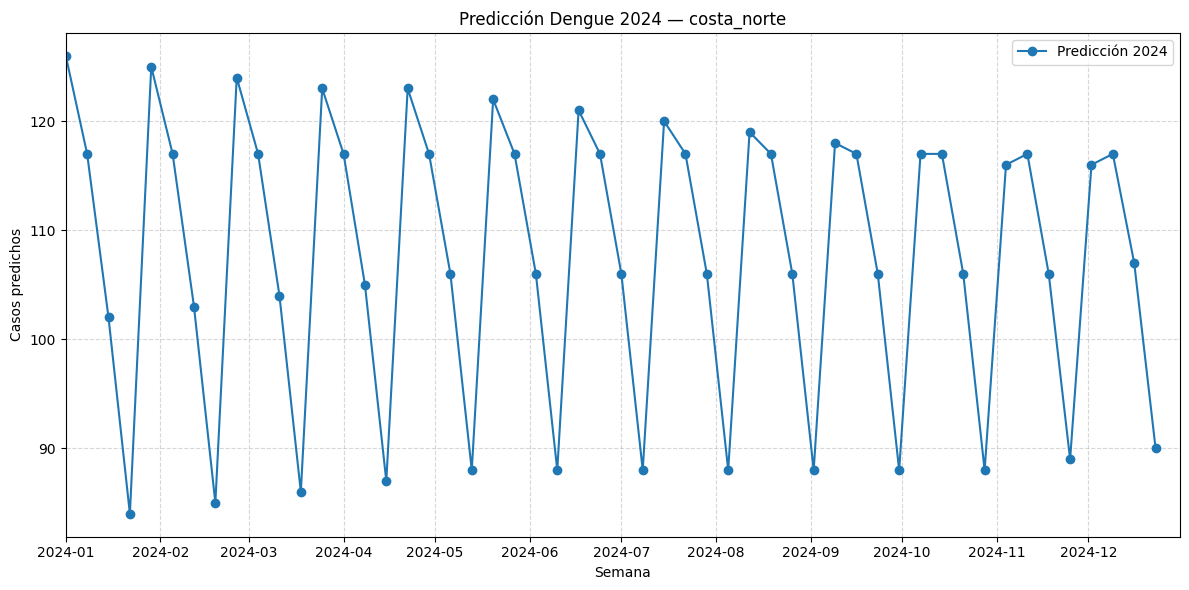

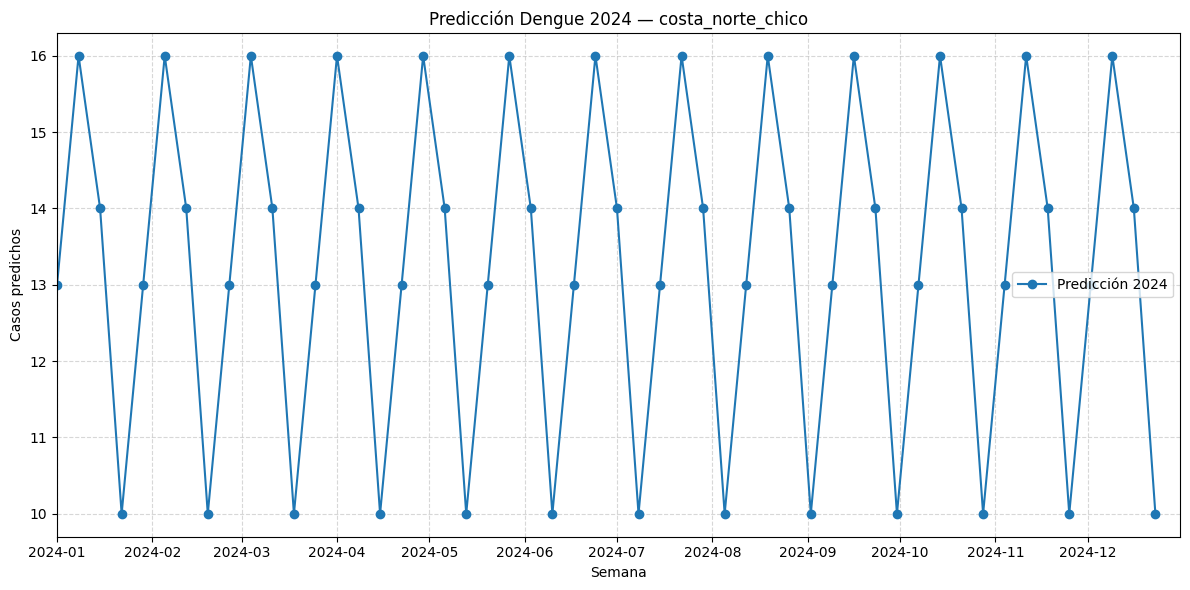

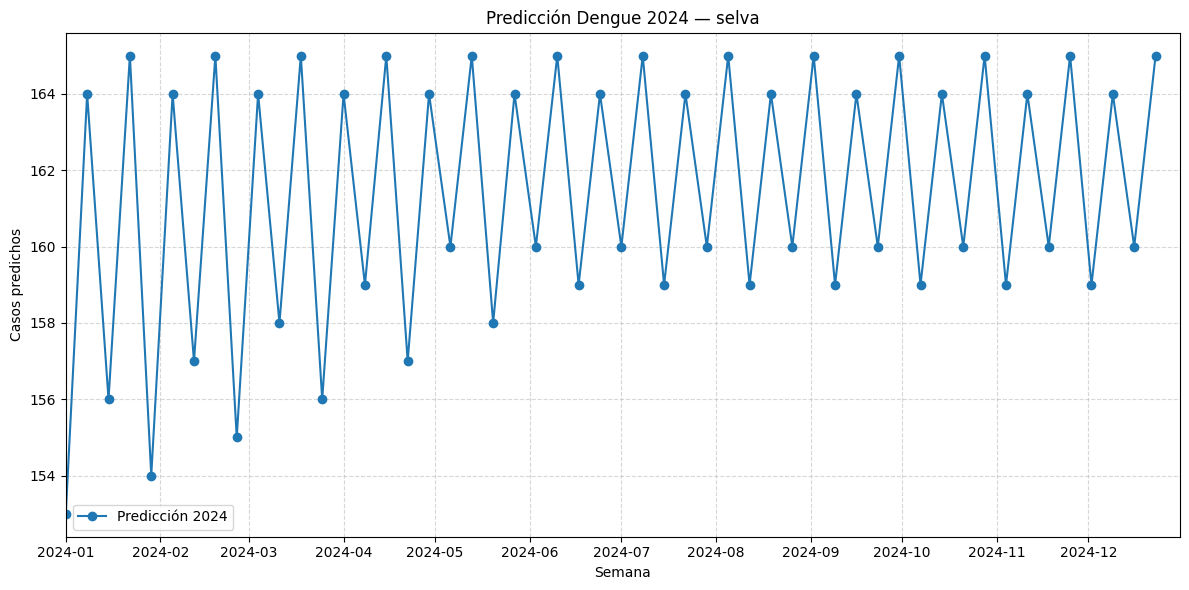

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Generar fecha aproximada del inicio de semana ISO
df_preds_lineal['week_start'] = pd.to_datetime(df_preds_lineal['ano'].astype(str) + '-W' + df_preds_lineal['semana'].astype(str).str.zfill(2) + '-1', format='%G-W%V-%u')
df_preds_lineal = df_preds_lineal[df_preds_lineal['week_start'].dt.year == 2024]

# Ordenar por fecha por si acaso
df_preds_lineal = df_preds_lineal.sort_values(['macro_region', 'week_start'])

# Gráfico por macro región
for mr, g in df_preds_lineal.groupby('macro_region'):
    plt.figure(figsize=(12, 6))
    plt.plot(g['week_start'], g['y_pred'], marker='o', label='Predicción 2024')
    plt.title(f'Predicción Dengue 2024 — {mr}')
    plt.xlabel('Semana')
    plt.ylabel('Casos predichos')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.xlim(pd.to_datetime('2024-01-01'), pd.to_datetime('2024-12-31'))
    plt.tight_layout()
    plt.show()



In [ ]:
# Obtener el mejor pipeline (ejemplo: si fue 'XGB_custom')
best_pipeline = next(r['estimator'] for r in results if r['modelo'] == best_name_overall)

# Acceder al ColumnTransformer (etapa 'prep' del pipeline)
preprocessor = best_pipeline.named_steps['prep']  # <- Esto es tu ColumnTransformer

In [ ]:
# Aplicar transformación a tus datos (ejemplo: X_train)
X_transformed = preprocessor.transform(X_train)  # Matriz transformada completa (num + cat)

# Obtener las partes separadas (numéricas y categóricas)
X_num_transformed = preprocessor.named_transformers_['num'].transform(X_train[num_feats])
X_cat_transformed = preprocessor.named_transformers_['cat'].transform(X_train[cat_feats])

# Si quieres los nombres de las características categóricas después del OneHot
cat_encoder = preprocessor.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(cat_feats)

In [ ]:
import pandas as pd

# Datos numéricos escalados (con nombres de columnas)
df_num_transformed = pd.DataFrame(
    X_num_transformed,
    columns=num_feats,
    index=X_train.index
)

# Datos categóricos codificados (con nombres de columnas)
df_cat_transformed = pd.DataFrame(
    X_cat_transformed.toarray(),  # OneHot devuelve una matriz sparse por defecto
    columns=cat_feature_names,
    index=X_train.index
)

# Combinar ambos
df_transformed = pd.concat([df_num_transformed, df_cat_transformed], axis=1)
print(df_transformed.head())

        ano    semana   sin_sem   cos_sem  precip_mean  temp_max_mean  \
0 -0.854247 -1.055096  1.127658  0.714248     0.003460       0.805085   
1 -0.854247 -0.986345  1.198180  0.557892     0.004399       0.446438   
2 -0.854247 -0.917594  1.249300  0.394194     0.059798       0.404244   
3 -0.854247 -0.642591  1.249300 -0.285411     0.006277       0.420067   
4 -0.854247 -0.573840  1.198180 -0.449109     0.098765       0.485994   

   temp_min_mean  hum_mean  altitud_mean     lag_1  ...     lag_3     lag_4  \
0       1.107584 -0.933074     -0.754574 -0.529345  ... -0.523018 -0.519649   
1       1.143498 -0.603343     -0.754574 -0.529345  ... -0.523018 -0.519649   
2       1.157863 -0.706275     -0.754574 -0.517711  ... -0.523018 -0.519649   
3       1.236872 -0.418415     -0.754574 -0.521589  ... -0.523018 -0.519649   
4       0.934302 -0.383959     -0.577210 -0.521589  ... -0.511346 -0.519649   

     roll_4  flag_covid_mod  oni_mean  total_mean  climadjust_mean  \
0 -0.539058     